In [484]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [485]:
#Credit Data
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [486]:
#Real Estate
df_NY = pd.read_csv("NYC_Real_Estate.csv")
df_NY.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


<h1>Assignment 4</h1>
<h3>Overview</h3>
For this assignment you'll do a realistic exploration of data up to and including creating predictive regression model(s).
<h3>Data</h3>
The data is the included datasets:
<ul>
<li><h4>Linear Regression:</h4> "NYC_Real_Estate.csv", which is a subset of some real data on the housing market in NYC. You'll use this dataset to create a linear regression model.
<li><h4>Logistic Regression:</h4> "credit_risk_dataset.csv", which is a set of simulated credit data. You'll use this dataset to create a logistic regression classification model.
</ul>  

<h3>Part 1 - Data Preparation: Both Datasets</h3>
<h4>See the two previews above</h4>
<h4>Note: There's nothing that you explicitly need to produce here, it is getting your data ready for the next step. </h4>
The first part of your process should be to clean and prepare the data (each set). It is in its original form, so there's some stuff in there that isn't perfect. Some things to consider are:
<ul>
<li>Are the varaibles in the data relevant? Some may not be. Use both general knowledge and analysis to make a judgement. 
<li>Are there missing values? If so, what does that mean? Especially with the T/F columns in the data. 
<li>What data format is the data? Categorical/numerical? 
<li>Are there outliers? Should they stay?
</ul>

There's no expectation for you to do any extreme amount of research or analysis to use the data, the cleanup required should be reasonably simple, but required. What to keep/remove/change is up to you. There is not one fixed answer. As you make choices, note a justification. This preparation and clean up kind of blends into the EDA for each. 

<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 

<h3>Overall Format (15% of grade)</h3>
Please make your workbook readable. Someone should be able to read through from end to end and get a solid understanding of what happened and what the findings were. The goal is to basically say, "here's a walkthrough of how I did this regression, and here are the results."

You Formatting is important in making things clear. This shouldn't end up being insanely complex, if it does, you've likely overthought it in some way. 

<h3>Data Dictionary and Documentation</h3>
<p>
For the real estate data, there are some notes in the real_estate_notes.txt file in this repository that explains some of the data values. The PDF is the 'glossary of terms" that the notes file refers to. 
</p>
<p>
For the credit data, there are some notes in the credit_notes.txt file. This one is really simple in terms of what the data is and means
</p>
<p>
I don't think that you need much background information to make sense of this data, it has been simplified a bit. If something doesn't make sense, please ask.
</p>

<h3>Tools, Technologies, and Techniques</h3>
<p>
You can use whatever tools/packages you'd like to do the regression and the EDA. Thinkstats, thinkplot, seaborn, scipy, scikitlearn, statsmodels, etc are all fair game, as are anything else. You'll just need to import them.
</p>

<h2>Part 1: NYC Real Estate EDA

In [487]:
df_NY.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,48248.000000,48248.000000,48248.000000,48248.000000,48248.000000,48248.000000,4.824800e+04,48248.000000,4.824800e+04
mean,3.251554,4984.154535,234.400742,10939.604087,2.569682,2.837755,3.672552e+03,1827.738082,1.155576e+06
std,0.903331,3427.528068,496.413133,1072.741157,17.468624,20.752771,2.947540e+04,464.418481,1.340423e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,2204.000000,21.000000,10469.000000,1.000000,1.000000,8.280000e+02,1920.000000,8.056000e+04
50%,3.000000,4660.000000,45.000000,11217.000000,1.000000,1.000000,1.620000e+03,1931.000000,4.800000e+05
75%,4.000000,6996.000000,94.000000,11237.000000,2.000000,2.000000,2.520000e+03,1961.000000,8.300000e+05
max,5.000000,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,3.750565e+06,2017.000000,2.210000e+09


In [488]:
df_NY['ZIP CODE'].value_counts()

11201    1324
11235    1312
11234    1165
11229     916
11215     899
         ... 
10006       1
10167       1
10803       1
10044       1
11005       1
Name: ZIP CODE, Length: 180, dtype: int64

In [489]:
df_NY = df_NY[df_NY['SALE PRICE']>0]
df_NY = df_NY.drop(columns={"TAX CLASS AT TIME OF SALE", "LOT", "RESIDENTIAL UNITS", "BUILDING CLASS AT TIME OF SALE" })
df_NY.describe()

,BOROUGH,BLOCK,ZIP CODE,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,38020.000000,38020.000000,38020.000000,38020.000000,3.802000e+04,38020.000000,3.802000e+04
mean,3.368438,5126.288769,10936.771883,2.741978,3.574482e+03,1852.286744,1.466445e+06
std,0.964818,3634.279630,1023.802931,21.678107,3.007989e+04,417.960253,1.508489e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00
25%,3.000000,2135.000000,10466.000000,1.000000,8.835000e+02,1920.000000,3.850000e+05
50%,3.000000,4664.000000,11217.000000,1.000000,1.552000e+03,1931.000000,6.000000e+05
75%,4.000000,7273.000000,11358.000000,2.000000,2.352000e+03,1962.000000,9.500000e+05
max,5.000000,16319.000000,11694.000000,2261.000000,3.750565e+06,2017.000000,2.210000e+09


In [490]:
df_NY.head()

,BOROUGH,BLOCK,ZIP CODE,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,1,392,10009,5,6440,1900,6625000
1,1,402,10009,10,6794,1913,3936272
2,1,404,10009,6,4615,1900,8000000
3,1,406,10009,8,4226,1920,3192840
4,1,387,10009,24,18523,1920,16232000


In [491]:
#sns.pairplot(df_NY)

In [492]:
df_NY = df_NY[df_NY['YEAR BUILT']> 1500]

In [493]:
corr = df_NY.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,BOROUGH,BLOCK,ZIP CODE,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,1.00,0.19,0.09,-0.07,-0.09,0.17,-0.09
BLOCK,0.19,1.00,0.38,-0.04,-0.05,-0.02,-0.06
ZIP CODE,0.09,0.38,1.00,-0.05,-0.07,-0.13,-0.06
TOTAL UNITS,-0.07,-0.04,-0.05,1.00,0.61,-0.01,0.14
GROSS SQUARE FEET,-0.09,-0.05,-0.07,0.61,1.00,0.01,0.51
YEAR BUILT,0.17,-0.02,-0.13,-0.01,0.01,1.00,-0.00
SALE PRICE,-0.09,-0.06,-0.06,0.14,0.51,-0.00,1.00


<h2>Credit Risk Data Set EDA<h2>

In [494]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [495]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [496]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [497]:
df = df.dropna()
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [499]:
#sns.pairplot(df, hue='loan_status')

In [500]:
df = df[df['person_emp_length']< 50]
df = df[df['person_age']< 100]
df = df[df['person_income']< 200000]

In [501]:
df2 = pd.get_dummies(df, drop_first=True)
df2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


<h2>Part 2: Linear Regression<h2>

In [502]:
y = np.array(df_NY["SALE PRICE"]).reshape(-1,1)
x = np.array(df_NY.drop(columns={'SALE PRICE'}))
x.shape, y.shape

((36189, 6), (36189, 1))

In [503]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=.3)
print("X-Train:", xTrain.shape)
print("X-Test:", xTest.shape)
print("Y-Train:", yTrain.shape)
print("Y-Test:", yTest.shape)

X-Train: (25332, 6)
X-Test: (10857, 6)
Y-Train: (25332, 1)
Y-Test: (10857, 1)


In [504]:
model = LinearRegression()
model.fit(xTrain,yTrain)

LinearRegression()

In [505]:
import statsmodels.api as sm
X2 = sm.add_constant(xTrain)
est = sm.OLS(yTrain,X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     1656.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:57:00   Log-Likelihood:            -4.5366e+05
No. Observations:               25332   AIC:                         9.073e+05
Df Residuals:                   25325   BIC:                         9.074e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.352e+07   6.01e+06      2.251      0.0

<h2>Zip code and Year Built can go.

In [506]:
df_NY = df_NY.drop(columns={'YEAR BUILT'})

In [507]:
ypred = model.predict(xTest)
mean_squared_error(ypred,yTest,squared=False)

7161554.561287463

In [508]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


In [509]:
calc_vif(df_NY)
#they're fine so we will leave them in

,variables,VIF
0,BOROUGH,13.605929
1,BLOCK,3.223909
2,ZIP CODE,14.492671
3,TOTAL UNITS,1.742218
4,GROSS SQUARE FEET,2.294741
5,SALE PRICE,1.458535


In [512]:

r_sq = model.score(x, y)
print('R-squared:', r_sq)
print('Intercept:', model.intercept_[0])
print('Coefs:', model.coef_[0])

R-squared: 0.3077988722767495
Intercept: 13521073.314554261
Coefs: [-7.62096064e+05 -1.11941697e+02 -2.05752909e+02 -1.89884735e+05
  3.23142707e+02 -3.73474005e+03]


In [ ]:
tmp = model.predict(x)
mean_squared_error(tmp, y, squared=False)

13373236.659111807

In [513]:
#Get Residuals and picture them in a DF for easy reading. 
tmp1 = pd.DataFrame(y, columns={"Y values"})
tmp2 = pd.DataFrame(tmp, columns={"Predictions"})
tmp3 = pd.DataFrame((y-tmp), columns={"Residual"})
resFrame = pd.concat([tmp1,tmp2,tmp3], axis=1)
resFrame.head()

,Y values,Predictions,Residual
0,6625000,5.063074e+06,1.561926e+06
1,3936272,3.037412e+06,8.988596e+05
2,8000000,3.847132e+06,4.152868e+06
3,3192840,2.729455e+06,4.633852e+05
4,16232000,2.186692e+06,1.404531e+07


<h2>Part 3: Logistic Regression<h2>

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [ ]:
df2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28143 entries, 1 to 32580
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   28143 non-null  int64  
 1   person_income                28143 non-null  int64  
 2   person_emp_length            28143 non-null  float64
 3   loan_amnt                    28143 non-null  int64  
 4   loan_int_rate                28143 non-null  float64
 5   loan_status                  28143 non-null  int64  
 6   loan_percent_income          28143 non-null  float64
 7   cb_person_cred_hist_length   28143 non-null  int64  
 8   person_home_ownership_OTHER  28143 non-null  uint8  
 9   person_home_ownership_OWN    28143 non-null  uint8  
 10  person_home_ownership_RENT   28143 non-null  uint8  
 11  loan_intent_EDUCATION        28143 non-null  uint8  
 12  loan_intent_HOMEIMPROVEMENT  28143 non-null  uint8  
 13  loan_intent_MEDI

In [ ]:
df2['loan_status']=df2['loan_status'].astype('category')
df2['person_home_ownership_OTHER']=df2['person_home_ownership_OTHER'].astype('category')
df2['person_home_ownership_OWN']=df2['person_home_ownership_OWN'].astype('category')
df2['person_home_ownership_RENT']=df2['person_home_ownership_RENT'].astype('category')
df2['loan_intent_EDUCATION']=df2['loan_intent_EDUCATION'].astype('category')
df2['loan_intent_HOMEIMPROVEMENT']=df2['loan_intent_HOMEIMPROVEMENT'].astype('category')
df2['loan_intent_MEDICAL']=df2['loan_intent_MEDICAL'].astype('category')
df2['loan_intent_PERSONAL']=df2['loan_intent_PERSONAL'].astype('category')
df2['loan_intent_VENTURE']=df2['loan_intent_VENTURE'].astype('category')
df2['loan_grade_B']=df2['loan_grade_B'].astype('category')
df2['loan_grade_C']=df2['loan_grade_C'].astype('category')
df2['loan_grade_D']=df2['loan_grade_D'].astype('category')
df2['loan_grade_E']=df2['loan_grade_E'].astype('category')
df2['loan_grade_F']=df2['loan_grade_F'].astype('category')
df2['loan_grade_G']=df2['loan_grade_G'].astype('category')
df2['cb_person_default_on_file_Y']=df2['cb_person_default_on_file_Y'].astype('category')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28143 entries, 1 to 32580
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   person_age                   28143 non-null  int64   
 1   person_income                28143 non-null  int64   
 2   person_emp_length            28143 non-null  float64 
 3   loan_amnt                    28143 non-null  int64   
 4   loan_int_rate                28143 non-null  float64 
 5   loan_status                  28143 non-null  category
 6   loan_percent_income          28143 non-null  float64 
 7   cb_person_cred_hist_length   28143 non-null  int64   
 8   person_home_ownership_OTHER  28143 non-null  category
 9   person_home_ownership_OWN    28143 non-null  category
 10  person_home_ownership_RENT   28143 non-null  category
 11  loan_intent_EDUCATION        28143 non-null  category
 12  loan_intent_HOMEIMPROVEMENT  28143 non-null  category
 13  l

In [ ]:
y1 = np.array(df2["loan_status"]).reshape(-1,1)
y1.shape

(28143, 1)

In [ ]:
dfc = df2.drop(columns={"loan_status"})
x1 = np.array(dfc)
dfc.shape

(28143, 22)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33)

md2 = LogisticRegression().fit(X_train, y_train.ravel())
md2Pred = md2.predict(x_test)
md2Pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
score = md2.score(x_test, y_test)
print(score)

0.301464254952627


In [ ]:
X3 = sm.add_constant(X_train)
est3 = sm.OLS(y_train,X3)
est4 = est3.fit()
print(est4.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     489.6
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:47:38   Log-Likelihood:                -5838.3
No. Observations:               18855   AIC:                         1.172e+04
Df Residuals:                   18832   BIC:                         1.190e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1452      0.027     -5.325      0.0

drop 1, 7, 8, 12, 16, 22

In [ ]:
 df2.drop(columns={'person_age', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_intent_PERSONAL', 'loan_grade_D'})

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,9600,5.0,1000,11.14,0,0,1,0,1,0,0,0,1,0,0,0,0,0
2,9600,1.0,5500,12.87,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,65500,4.0,35000,15.23,1,0,0,1,0,0,1,0,0,1,0,0,0,0
4,54400,8.0,35000,14.27,1,0,0,1,0,0,1,0,0,1,0,0,0,1
5,9900,2.0,2500,7.14,1,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,53000,1.0,5800,13.16,0,0,0,0,0,0,0,0,0,1,0,0,0,0
32577,120000,4.0,17625,7.49,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32578,76000,3.0,35000,10.99,1,0,0,1,0,1,0,0,1,0,0,0,0,0
32579,150000,5.0,15000,11.48,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df2.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import confusion_matrix

def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label


F1: 0.3188405797101449
Acc: 0.8127691645133506


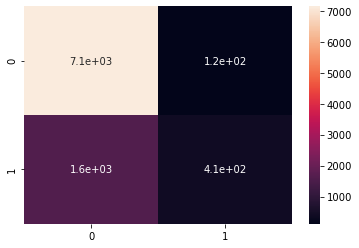

In [ ]:
preds = md2.predict(X_test)

labels = convert_prob_to_label(np.array(preds))
conf_matrix = confusion_matrix(y_test,labels)
sns.heatmap(conf_matrix, annot=True)

print("F1:",f1_score(y_test, labels))
print("Acc:",accuracy_score(y_test, labels))

<h2>Part 4: Is it good?

The linear regression model is not good. The accuracy is under 30% accurate. It seems like there is nothing included in the dataset that accurately predicts sale price of a home. The only thing that is kind of correlated is square footage. 


The logistic regression model was more accurate than the linear model with the other dataset. I was able to use the get dummies and turn everything into categorical data which helped. It still has room for improvement as there are still a lot of false negatives and positives and the accuracy is around 80%. The F1 score isn't very high though. 